# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as pyp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# DATA READING

In [3]:
data = pd.read_csv('CARS_DATA.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# DATA WRANGLING

In [4]:
data.columns = data.columns.str.upper()
data.columns

Index(['NAME', 'YEAR', 'SELLING_PRICE', 'KM_DRIVEN', 'FUEL', 'SELLER_TYPE',
       'TRANSMISSION', 'OWNER'],
      dtype='object')

In [5]:
len(data)

4340

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   NAME           4340 non-null   object
 1   YEAR           4340 non-null   int64 
 2   SELLING_PRICE  4340 non-null   int64 
 3   KM_DRIVEN      4340 non-null   int64 
 4   FUEL           4340 non-null   object
 5   SELLER_TYPE    4340 non-null   object
 6   TRANSMISSION   4340 non-null   object
 7   OWNER          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
data.head()

,NAME,YEAR,SELLING_PRICE,KM_DRIVEN,FUEL,SELLER_TYPE,TRANSMISSION,OWNER
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [8]:
data['NAME'].value_counts().head(15)

Maruti Swift Dzire VDI      69
Maruti Alto 800 LXI         59
Maruti Alto LXi             47
Maruti Alto LX              35
Hyundai EON Era Plus        35
Maruti Swift VDI BSIV       29
Maruti Wagon R VXI BS IV    29
Maruti Swift VDI            27
Hyundai EON Magna Plus      24
Maruti Wagon R LXI Minor    24
Maruti 800 AC               23
Maruti Wagon R LXI          23
Maruti Ritz VDi             22
Mahindra XUV500 W8 2WD      22
Hyundai i10 Magna           22
Name: NAME, dtype: int64

In [9]:
brands = {}
for cars in data['NAME'].value_counts().index:
    if cars.split()[0] not in brands:
        brands[cars.split()[0]] = 1
    else:
        brands[cars.split()[0]] += 1

In [10]:
brands

{'Maruti': 303,
 'Hyundai': 244,
 'Mahindra': 151,
 'Renault': 36,
 'Chevrolet': 60,
 'Tata': 144,
 'Ford': 109,
 'Skoda': 36,
 'Audi': 23,
 'Toyota': 88,
 'Mercedes-Benz': 20,
 'BMW': 14,
 'Honda': 109,
 'Volkswagen': 53,
 'Nissan': 26,
 'Datsun': 19,
 'Fiat': 26,
 'Jeep': 2,
 'Jaguar': 4,
 'Mitsubishi': 4,
 'Ambassador': 3,
 'Volvo': 4,
 'Land': 5,
 'MG': 2,
 'Kia': 1,
 'OpelCorsa': 2,
 'Isuzu': 1,
 'Daewoo': 1,
 'Force': 1}

# EXPLORATORY DATA ANALYSIS (EDA)

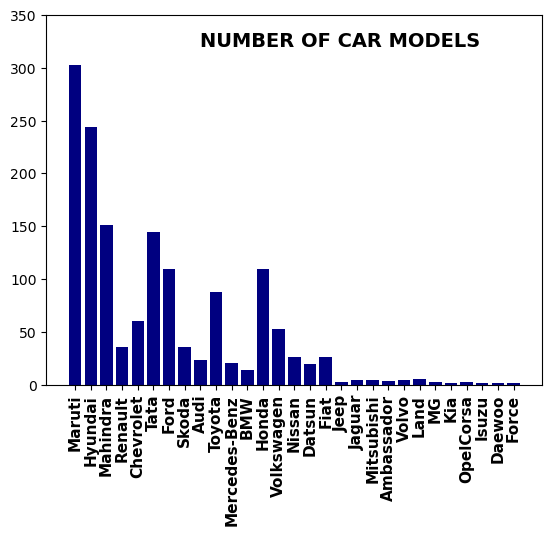

In [11]:
pyp.ylim(0,350)
pyp.bar(brands.keys(),brands.values(),color='navy')
pyp.xticks(rotation=90,weight='bold',fontsize=11)
ax = pyp.gca()
ax.text(8,320,'NUMBER OF CAR MODELS',weight='bold',fontsize=14)
pyp.show()

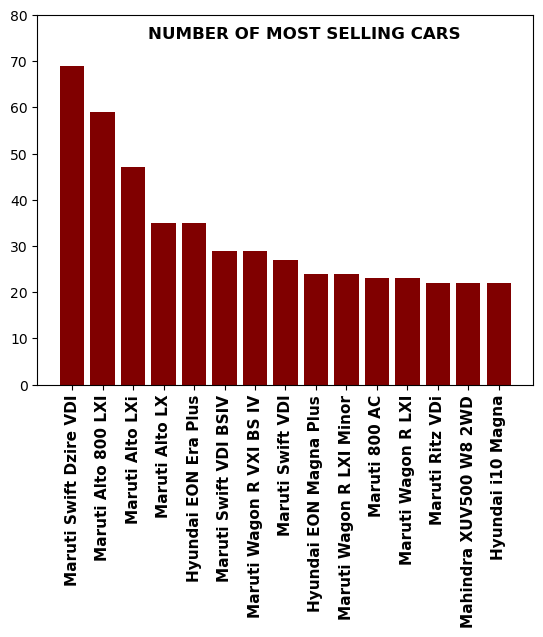

In [12]:
pyp.ylim(0,80)
pyp.bar(data['NAME'].value_counts().head(15).index,data['NAME'].value_counts().head(15).values,\
       color='maroon')
pyp.xticks(rotation=90,fontsize=11,weight='bold')
ax = pyp.gca()
ax.text(2.5,75,'NUMBER OF MOST SELLING CARS',weight='bold',fontsize=12)
pyp.show()

In [13]:
data.head()

,NAME,YEAR,SELLING_PRICE,KM_DRIVEN,FUEL,SELLER_TYPE,TRANSMISSION,OWNER
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [14]:
for i in range(len(data)):
    data.loc[i,'MODEL'] = data.loc[i,'NAME'].split()[0]

In [15]:
data.head(3)

,NAME,YEAR,SELLING_PRICE,KM_DRIVEN,FUEL,SELLER_TYPE,TRANSMISSION,OWNER,MODEL
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai


In [16]:
data['MODEL'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [17]:
data['SELLING_PRICE'].max()

8900000

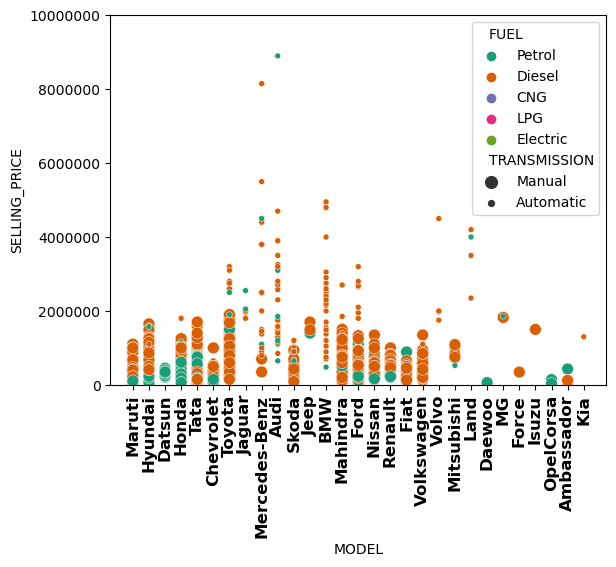

In [18]:
pyp.ticklabel_format(style='plain')
pyp.ylim(0,10000000)
sns.scatterplot(x='MODEL',y='SELLING_PRICE',data=data,hue='FUEL',palette='Dark2',\
                 size='TRANSMISSION')
pyp.xticks(rotation=90,weight='bold',fontsize=12)
pyp.show()

In [19]:
data.corr()['SELLING_PRICE']

YEAR             0.413922
SELLING_PRICE    1.000000
KM_DRIVEN       -0.192289
Name: SELLING_PRICE, dtype: float64

In [20]:
for cols in data.select_dtypes(include='object').columns:
    data[cols] = LabelEncoder().fit_transform(data[cols])

In [21]:
data.head(10)

,NAME,YEAR,SELLING_PRICE,KM_DRIVEN,FUEL,SELLER_TYPE,TRANSMISSION,OWNER,MODEL
0,775,2007,60000,70000,4,1,1,0,18
1,1041,2007,135000,50000,4,1,1,0,18
2,505,2012,600000,100000,1,1,1,0,10
3,118,2017,250000,46000,4,1,1,0,5
4,279,2014,450000,141000,1,1,1,2,9
5,812,2007,140000,125000,4,1,1,0,18
6,545,2016,550000,25000,4,1,1,0,10
7,1256,2014,240000,60000,4,1,1,2,25
8,390,2015,850000,25000,4,1,1,0,10
9,834,2017,365000,78000,0,1,1,0,18


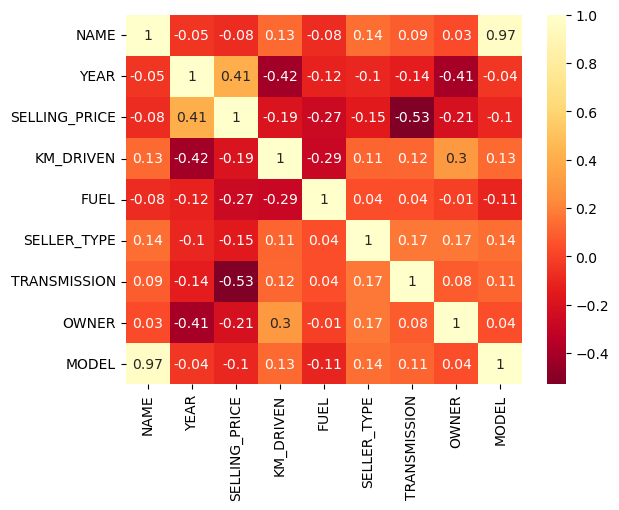

In [22]:
hold = round(data.corr(),2)
sns.heatmap(hold,cmap='YlOrRd_r',annot=True)
pyp.show()

In [23]:
dep_vars = data[['YEAR','FUEL','TRANSMISSION','OWNER','KM_DRIVEN']]
indep_var = data[['SELLING_PRICE']]

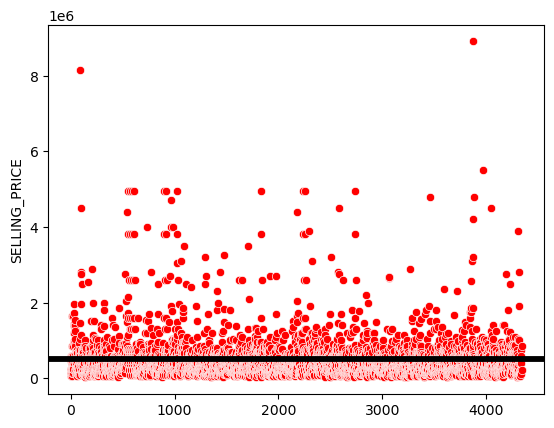

In [24]:
sns.scatterplot(x=range(1, len(data) + 1),y=data['SELLING_PRICE'],data=data,color='red',alpha=1)
pyp.axhline(data['SELLING_PRICE'].mean(),linewidth=4.2,color='black')
pyp.show()

In [25]:
data['YEAR'].value_counts(bins=3,normalize=True)*100

(2010.667, 2020.0]      75.852535
(2001.333, 2010.667]    22.741935
(1991.971, 2001.333]     1.405530
Name: YEAR, dtype: float64

In [26]:
under_75 = data[data['YEAR']<2020]
under_22 = data[data['YEAR'].between(2001.333, 2010.667)]
under_1 = data[data['YEAR']>1991.971]
y = []
for i in range(300):
    under_75 = data['SELLING_PRICE'].sample(7,random_state=i)
    under_22 = data['SELLING_PRICE'].sample(2,random_state=i)
    under_1 = data['SELLING_PRICE'].sample(1,random_state=i)
    final = pd.concat([under_75, under_22, under_1])
    y.append(final.mean())

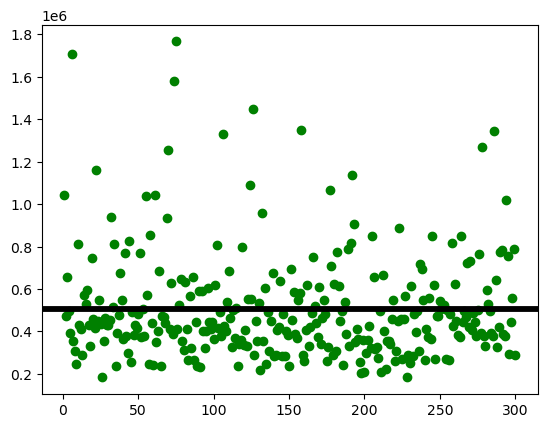

In [27]:
pyp.scatter(range(1,301), y,color='green')
pyp.axhline(data['SELLING_PRICE'].mean(),linewidth=4.2,color='black')
pyp.show()

In [28]:
data['YEAR'].value_counts(bins=2,normalize=True)*100

(2006.0, 2020.0]      92.119816
(1991.971, 2006.0]     7.880184
Name: YEAR, dtype: float64

In [29]:
under_90 = data[data['YEAR'].between(2006.0, 2020.0)]
under_10 = data[data['YEAR'].between(1991.971, 2006.0)]
y = []
empty = []
for i in range(300):
    under_90 = data['SELLING_PRICE'].sample(9,random_state=i)
    under_10 = data['SELLING_PRICE'].sample(1,random_state=i)
    empty.append([data['SELLING_PRICE'],data['YEAR'],data['FUEL'],data['TRANSMISSION'],data['OWNER'],\
                 data['KM_DRIVEN']])
    final = pd.concat([under_90, under_10])
    y.append(final.mean())

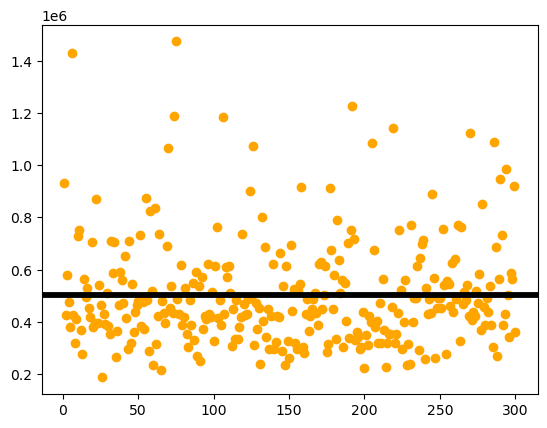

In [30]:
pyp.scatter(range(1,301), y,color='orange')
pyp.axhline(data['SELLING_PRICE'].mean(),linewidth=4.2,color='black')
pyp.show()

# MODEL TRAINING

In [31]:
x_train, x_test,y_train,y_test = train_test_split(data[['YEAR','FUEL','TRANSMISSION','OWNER','KM_DRIVEN']],\
                                                  data['SELLING_PRICE'],test_size =0.2)

In [32]:
res = LinearRegression().fit(x_train,y_train)
res

LinearRegression()

# MODEL PREDICTION

In [33]:
res.predict(x_test)

array([ 555686.65511389,   70087.17888829,  421728.1181338 ,
        597783.01149951,  105298.15756142,  276580.37942888,
        291357.38200799,  572741.4333079 ,  213605.91696921,
       1609630.76238875,  479913.67269158,  753969.14723589,
        288403.05067785,  778821.83324581,  181026.00765197,
       1344561.87093779,  589569.20179032,  433296.8555996 ,
        644165.23250255,   39130.28809281,  517403.3579165 ,
        227054.48755158,  293985.57055221,  326568.36068112,
        619640.85963224, 1602963.39259152,  673955.21204898,
       1600321.3937805 ,  597783.01149951,  718475.55933039,
        746074.42107868,  619194.5592985 ,  612678.00127272,
        778821.83324581,   80975.81198584,  419332.80268721,
        587694.29495262,  506230.48059639,  338788.52706598,
        303130.31712224,   43620.35035869,  570184.14975122,
       1453894.95830581,  -46952.97384928,  156541.23948871,
        363324.69454323,  498133.19178094,  -77998.05407077,
       -548007.57805057,

# ACCURACY OF MODEL

In [34]:
res.score(x_test,y_test)*100

50.100364366408144